In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


Shape of dataframe before dropping duplicates: (1025, 14)
Shape of dataframe after dropping duplicates: (302, 14)
Total rows dropped: 723


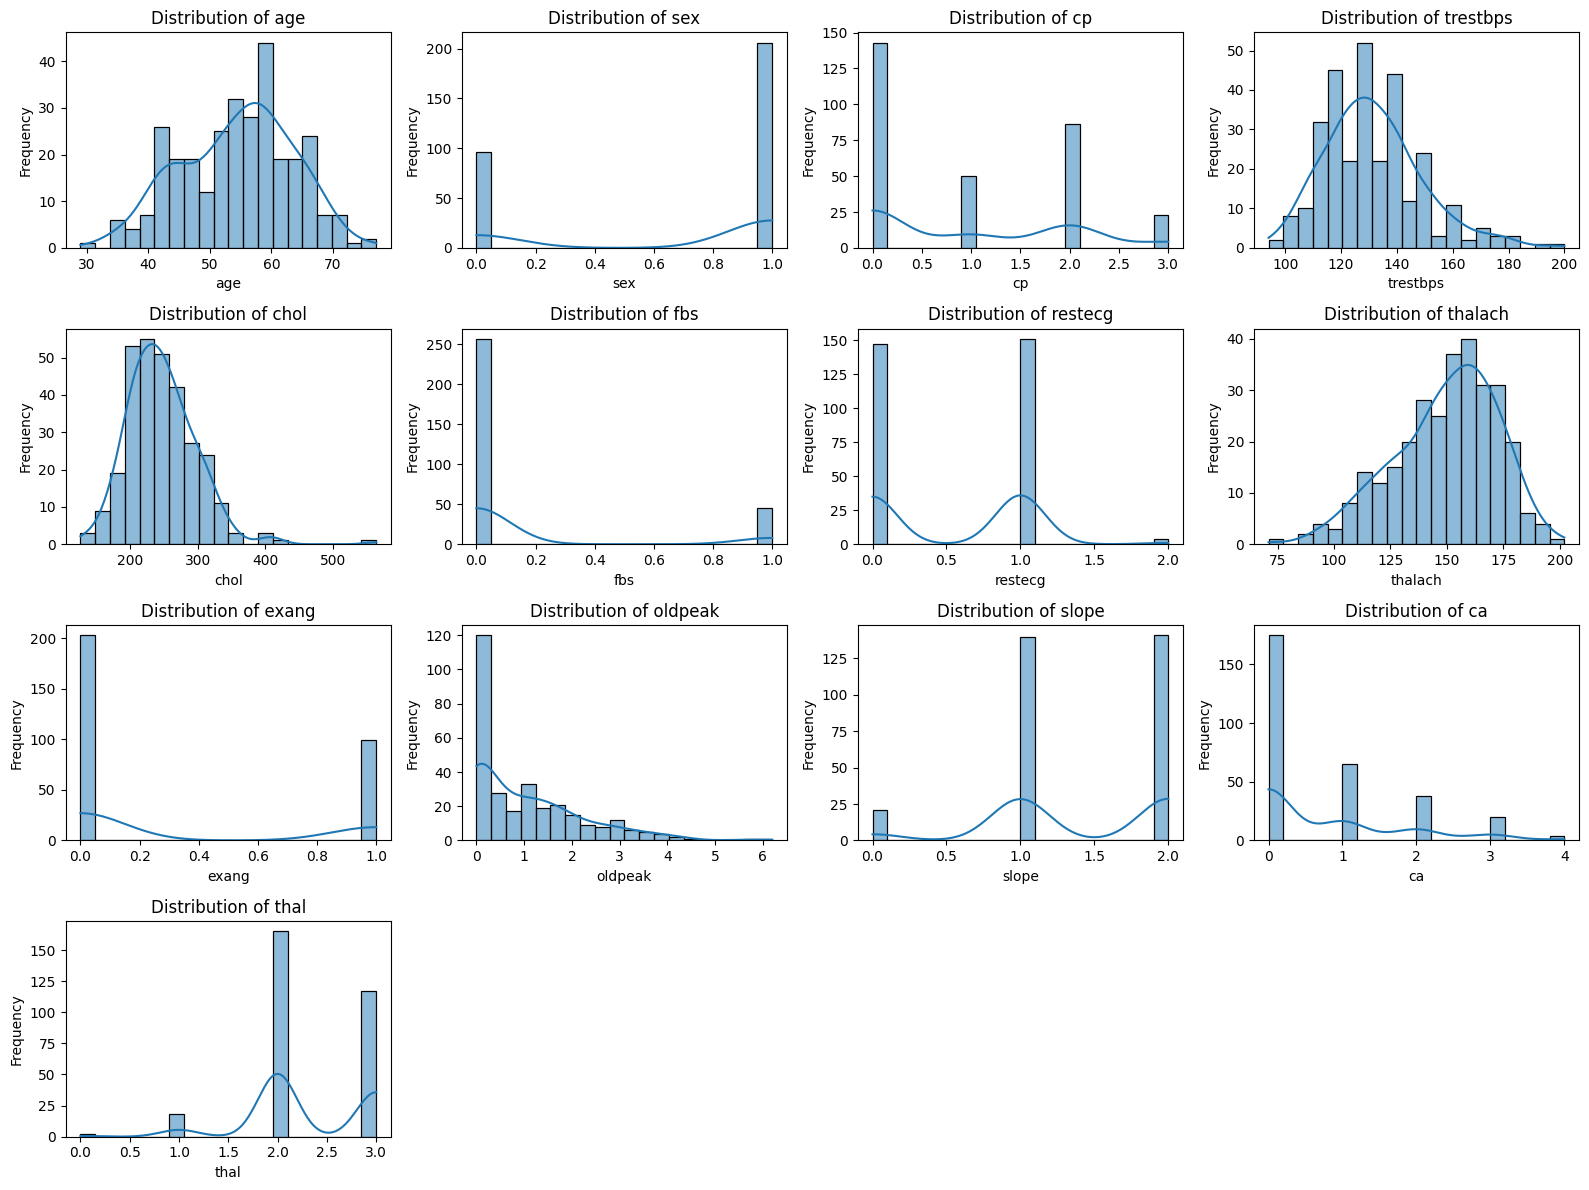

Basic Statistics:
             age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.526027 

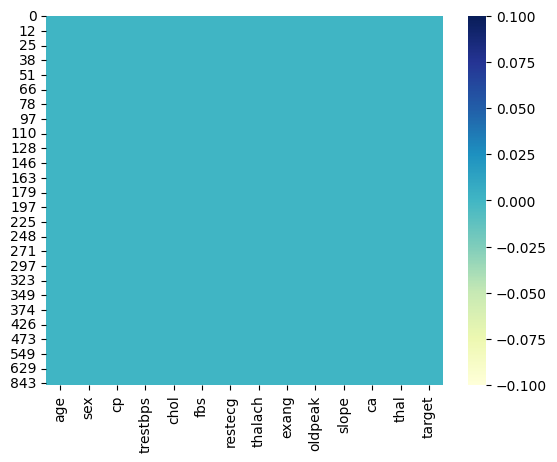

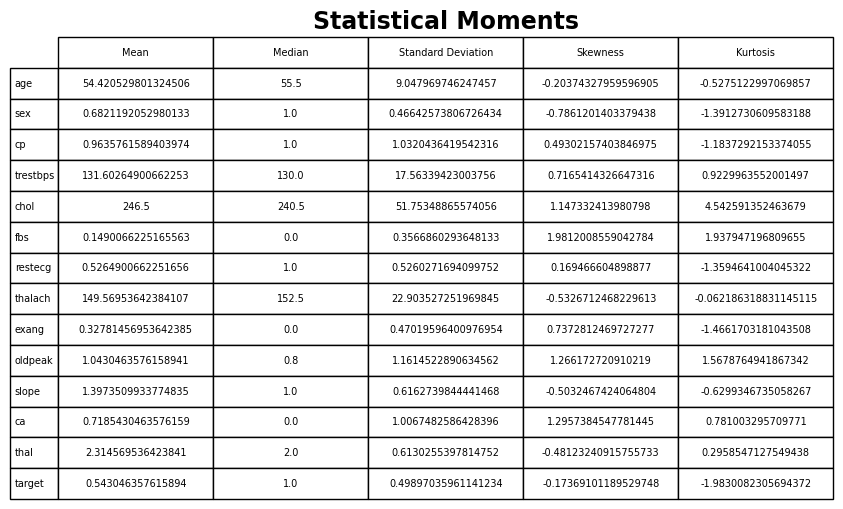

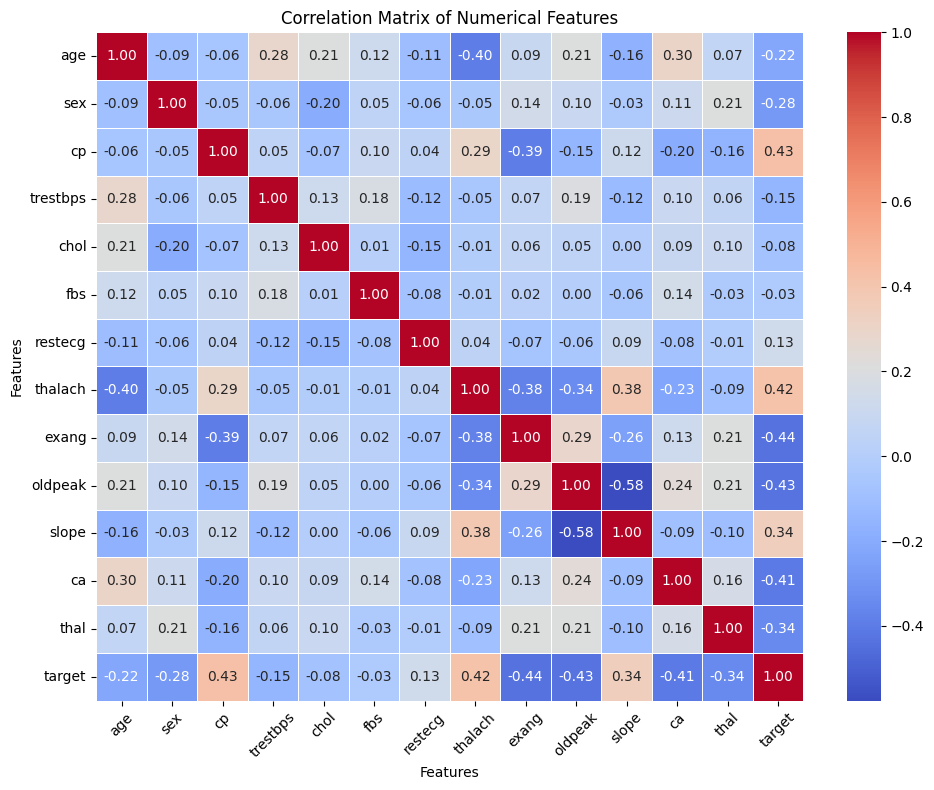

In [39]:
def load_dataset(file_path):
    """
    Loading the dataset from the file path "heart.csv.
    Returns:
    - DataFrame: It will load the dataset.
    """
    return pd.read_csv(file_path)
    
# Function to drop duplicates and print shape differneces
def drop_duplicates_and_print_shape(df):
    original_shape = df.shape
    df.drop_duplicates(keep="first", inplace=True)
    new_shape = df.shape
    print(f"Shape of dataframe before dropping duplicates: {original_shape}")
    print(f"Shape of dataframe after dropping duplicates: {new_shape}")
    print(f"Total rows dropped: {original_shape[0] - new_shape[0]}")

    plt.figure(figsize=(16, 12))
    for i, feature in enumerate(heart_df.columns[:-1]):
        plt.subplot(4, 4, i + 1)
        sns.histplot(heart_df[feature], bins=20, kde=True)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

def display_basic_statistics(data):
    """
    Displaying basic statistics of the dataset.
    """
    print("Basic Statistics:")
    print(data.describe(include = 'all'))
    print(data.head())
    print(data.info())
    print(data.shape)
    print(data.isna().sum())
    sns.heatmap(data.isnull(), cmap = "YlGnBu")

def calculate_statistical_moments(data):
    """
    Calculating statistical moments of the dataset.        
    Returns:
    - DataFrame: A dataFrame containing mean, median, std, skewness, and kurtosis values.
    """
    moments = {
        'Mean': data.mean(),
        'Median': data.median(),
        'Standard Deviation': data.std(),
        'Skewness': data.skew(),
        'Kurtosis': data.kurtosis()
    }
    moments_df = pd.DataFrame(moments)
    moments_df.index.name = 'Statistic'
    return moments_df

import matplotlib.pyplot as plt

def plot_statistical_moments_table(moments_df):
    """
    Plotting the statistical moments table.
    """
    plt.figure(figsize=(10, 6))
    plt.table(cellText=moments_df.values,
              colLabels=moments_df.columns,
              rowLabels=moments_df.index,
              loc='center',
              cellLoc='center',
              colWidths=[0.2]*len(moments_df.columns),
              bbox=[0, 0, 1, 1])
    plt.axis('off')  # Turn off axis
    plt.title('Statistical Moments', fontsize=17, fontweight='bold')
    plt.show()




def create_heatmap(data):
    """
    Creating a heatmap of the correlation matrix.    
    """
    corr_matrix = data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Matrix of Numerical Features')
    plt.xlabel('Features')
    plt.ylabel('Features')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Loading the dataset
heart_df = load_dataset("heart.csv")

drop_duplicates_and_print_shape(heart_df)
# Displaying basic statistics
display_basic_statistics(heart_df)
# Calculating and displaying major statistical moments
statistical_moments = calculate_statistical_moments(heart_df)
print("\nStatistical Moments:")
print(statistical_moments)
plot_statistical_moments_table(statistical_moments)
# Creating and displaying the heatmap
create_heatmap(heart_df)


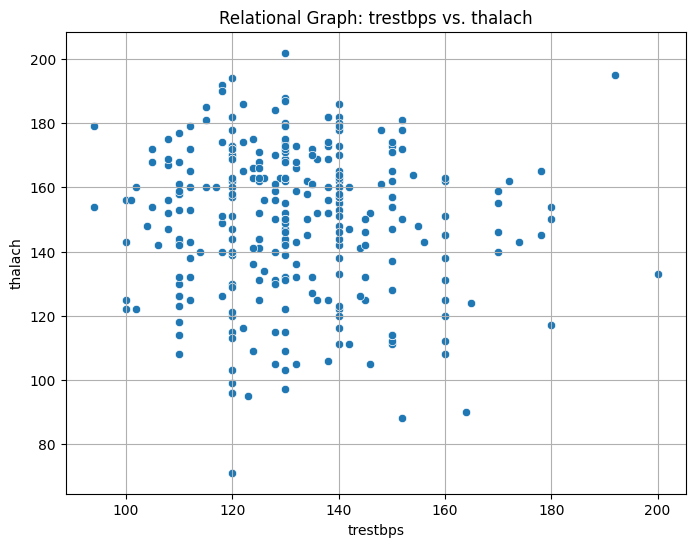

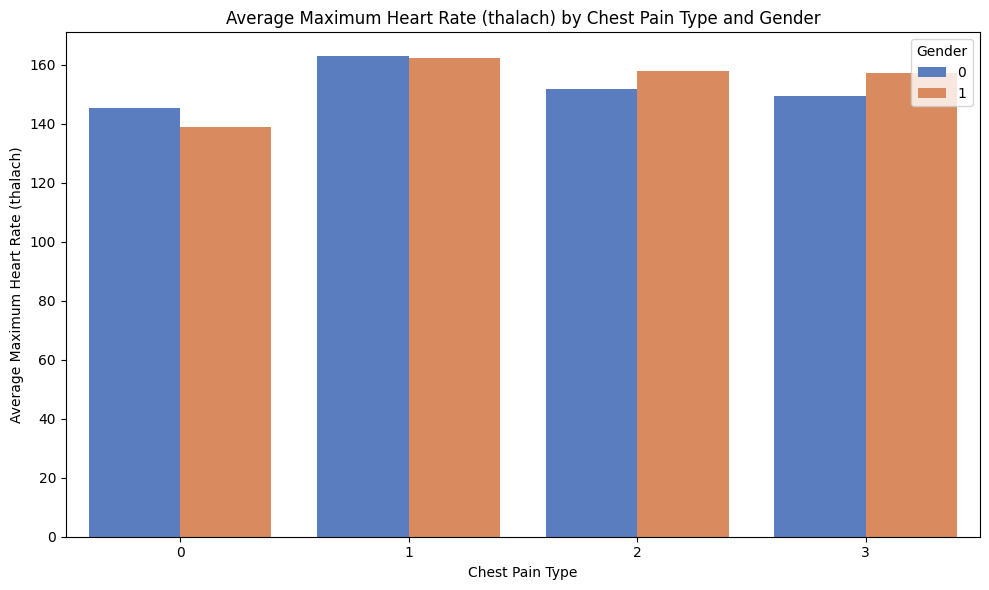

In [40]:

# Relational Graph Function between exang an thalach features
def create_relational_graph(data, x_var, y_var):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x_var, y=y_var, data=data)
    plt.title(f'Relational Graph: {x_var} vs. {y_var}')
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.grid(True)
    plt.show()

grouped_data = heart_df.groupby(['cp', 'sex'])['thalach'].mean().reset_index()

# Categorical Graph Function of cp and sex with thalach
def create_categorical_graph(grouped_data, x_var, y_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='cp', y='thalach', hue='sex', data=grouped_data, palette='muted')
    plt.title('Average Maximum Heart Rate (thalach) by Chest Pain Type and Gender')
    plt.xlabel('Chest Pain Type')
    plt.ylabel('Average Maximum Heart Rate (thalach)')
    plt.legend(title='Gender', loc='upper right')
    plt.xticks(rotation=0) 
    plt.tight_layout()
    plt.show()

# Example usage of each function
create_relational_graph(heart_df, 'trestbps', 'thalach')
create_categorical_graph(grouped_data, 'cp', 'thalach')


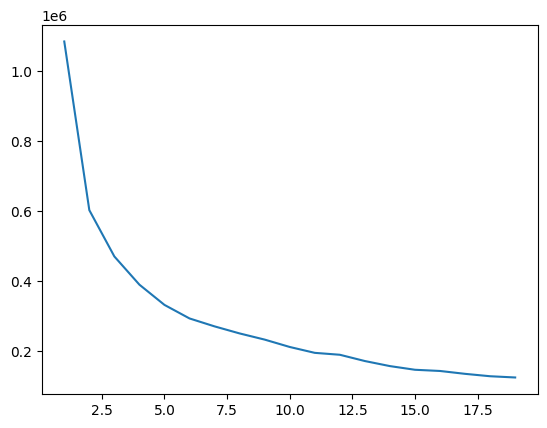

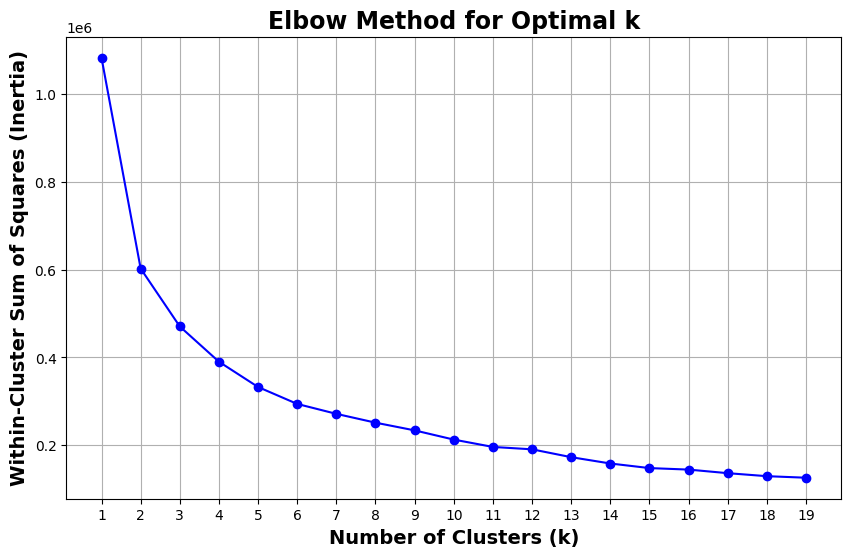

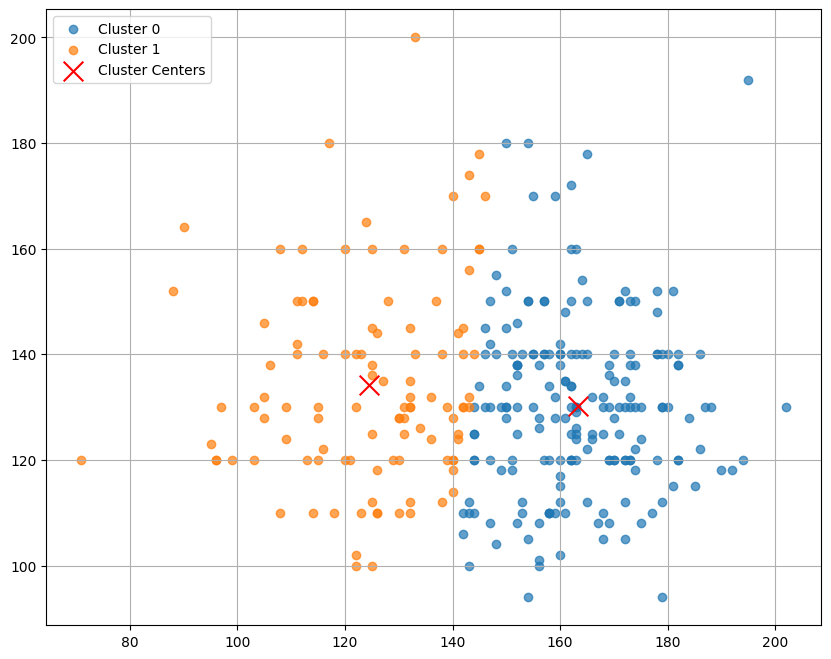

Predicted Cluster Labels for New Data:
Data Point 1: Cluster 0
Data Point 2: Cluster 1
Data Point 3: Cluster 0
Data Point 4: Cluster 0
Data Point 5: Cluster 0


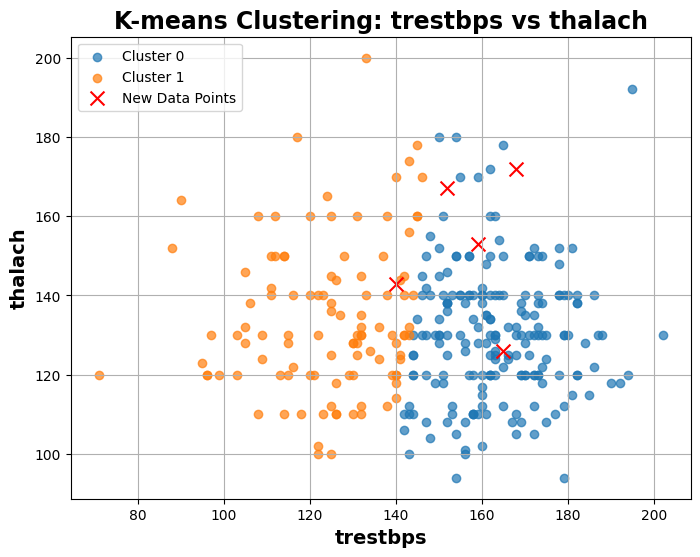

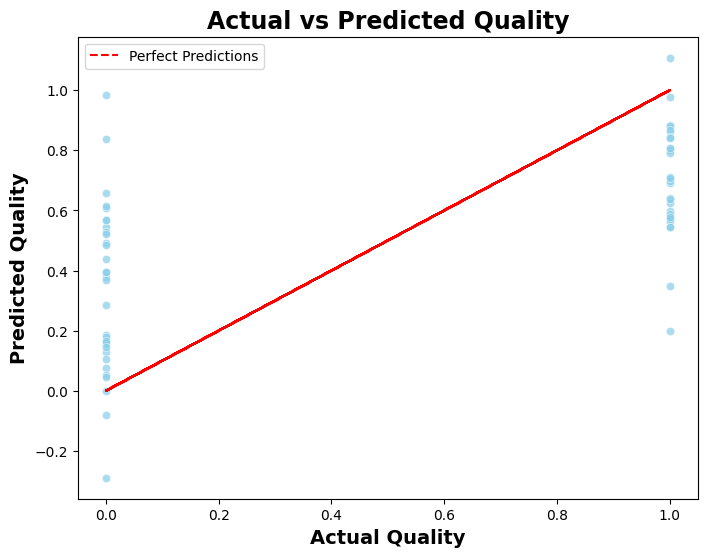

Coefficients: [-3.65697700e-04 -2.08152315e-01  1.26193849e-01 -3.22122731e-03
 -1.15701230e-04 -1.35058183e-03  9.29726263e-02  2.94094700e-03
 -8.31197348e-02 -7.25862621e-02  8.55367824e-02 -8.05856239e-02
 -9.07291860e-02]
Intercept: 0.8050423000369105
R-squared: 0.37038642951985057
Root Mean Squared Error: 0.39626087404952515
Mean Absolute Error: 0.33405652294803545
Mean Squared Error: 0.1570226803024936


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [41]:
# Calculating within-cluster sum of squares (WCSS)
wcss = []
X = heart_df.drop('target', axis=1)

for i in range(1, 20):
    kmean = KMeans(n_clusters=i, init='k-means++', random_state=30)
    kmean.fit(X)
    wcss.append(kmean.inertia_)

plt.plot(range(1, 20), wcss)

def plot_elbow_curve(data, target_column, k_range=(1, 20)):
    # Extracting features for clustering (excluding the target column)
    X = data.drop(target_column, axis=1)
    # target dropped
    # Initializing a list to store inertia values
    inertia_values = []

    # Test different values of k (number of clusters)
    k_values = range(*k_range)

    for k in k_values:
        # Creating KMeans clustering model
        kmeans = KMeans(n_clusters=k, random_state=30)
        kmeans.fit(X)

        # Appending the inertia value to the list
        inertia_values.append(kmeans.inertia_)

    # Plotting the elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
    plt.xlabel('Number of Clusters (k)', fontsize=14, fontweight='bold')
    plt.ylabel('Within-Cluster Sum of Squares (Inertia)', fontsize=14, fontweight='bold')
    plt.title('Elbow Method for Optimal k', fontsize=17, fontweight='bold')
    plt.xticks(k_values)
    plt.grid(True)
    plt.savefig('elbow_curve.png', dpi=300)
    plt.show()

# Function for K-means clustering
def perform_clustering(df, features, k=2):
    kmeans = KMeans(n_clusters=k, random_state=30)
    df['cluster'] = kmeans.fit_predict(df[features])
    return kmeans, df

# Function for plotting clusters
def plot_clusters(df, features, cluster_centers):
    plt.figure(figsize=(10, 8))
    for cluster_label in sorted(df['cluster'].unique()):
        cluster_data = df[df['cluster'] == cluster_label]
        plt.scatter(cluster_data[features[0]], cluster_data[features[1]], label=f'Cluster {cluster_label}', alpha=0.7)
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=200, c='red', label='Cluster Centers')
    plt.legend()
    plt.grid(True)
    plt.savefig('cluster_plot.png', dpi=300)
    plt.show()

# Function for fitting Linear Regression model
def fit_linear_regression(X_train, X_test, y_train, y_test):
    """
    Fitting a linear regression model and plot the actual vs. predicted values with confidence interval.
    
    Returns:
        LinearRegression: Fitted linear regression model.
        y_pred : Predicted values.
    """
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Plotting actual vs predicted values with confidence interval
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred, color='skyblue', alpha=0.7)
    plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Predictions')
    plt.title('Actual vs Predicted Disease', fontsize=17, fontweight='bold')
    plt.xlabel('Actual Disease', fontsize=14, fontweight='bold')
    plt.ylabel('Predicted Disease', fontsize=14, fontweight='bold')
    plt.legend()
    plt.savefig('fitting_plot.png', dpi=300)
    plt.show()
    
    return model, y_pred


# Extracting features for clustering
X = heart_df.drop('target', axis=1)

plot_elbow_curve(heart_df, 'target')

# Performing K-means clustering
kmeans_model, clustered_df = perform_clustering(heart_df, ['thalach', 'trestbps'])

# Plotting clusters
plot_clusters(clustered_df, ['thalach', 'trestbps'], kmeans_model.cluster_centers_)

# Predicting clusters for new data
new_data = pd.DataFrame({'thalach': [165, 140, 168, 152, 159], 'trestbps': [126, 143, 172, 167, 153]})
predicted_clusters = kmeans_model.predict(new_data)
print("Predicted Cluster Labels for New Data:")
for i, cluster_label in enumerate(predicted_clusters):
    print(f"Data Point {i + 1}: Cluster {cluster_label}")

plt.figure(figsize=(8, 6))

# Plotting existing clusters
for cluster_label in sorted(heart_df['cluster'].unique()):
    cluster_data = heart_df[heart_df['cluster'] == cluster_label]
    plt.scatter(cluster_data['thalach'], cluster_data['trestbps'], label=f'Cluster {cluster_label}', alpha=0.7)

# Plotting new data points with predicted cluster labels
plt.scatter(new_data['thalach'], new_data['trestbps'], marker='x', s=100, c='red', label='New Data Points')
plt.title('K-means Clustering: trestbps vs thalach', fontsize=17, fontweight='bold')
plt.xlabel('trestbps', fontsize=14, fontweight='bold')
plt.ylabel('thalach', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

# Splitting data for linear regression
X_train, X_test, y_train, y_test = train_test_split(X, heart_df['target'], test_size=0.2, random_state=42)

# Fitting it in  linear regression model
linear_model, y_pred = fit_linear_regression(X_train, X_test, y_train, y_test)

# Evaluating the model
coefficients = linear_model.coef_
intercept = linear_model.intercept_
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
